To create a CNN model which should be trained on 2 classes i.e cats and dogs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 ## Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
# execute this only once... if you run again, skip this part
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/AI/CV/5_train.zip", 'r') as zip_ref:        # get the path for train.zip using copypath. paste the link within the quotation
     # creates new folder 'cats_dogs_images' and saves all images present in train.zip
    zip_ref.extractall("/content/extracted_images")  # create a new folder, rename it and get the path of it using copypath.. paste the link here



In [4]:
files_list = os.listdir("/content/extracted_images/train")

# Count the number of files
num_files = len(files_list)
print(num_files)

25000


In [ ]:
print(files_list)

['dog.5601.jpg', 'dog.10540.jpg', 'dog.6083.jpg', 'dog.7096.jpg', 'dog.11796.jpg', 'cat.6910.jpg', 'dog.1411.jpg', 'dog.594.jpg', 'cat.8795.jpg', 'dog.3996.jpg', 'dog.4061.jpg', 'dog.7363.jpg', 'dog.11496.jpg', 'cat.2947.jpg', 'dog.10133.jpg', 'cat.7775.jpg', 'cat.10627.jpg', 'cat.6171.jpg', 'dog.5580.jpg', 'cat.12357.jpg', 'cat.7061.jpg', 'cat.3631.jpg', 'cat.9778.jpg', 'cat.3414.jpg', 'cat.11117.jpg', 'cat.2166.jpg', 'cat.140.jpg', 'dog.8095.jpg', 'cat.5553.jpg', 'dog.11483.jpg', 'dog.3949.jpg', 'dog.3597.jpg', 'cat.3321.jpg', 'cat.9878.jpg', 'cat.8037.jpg', 'dog.4476.jpg', 'cat.11990.jpg', 'cat.4815.jpg', 'dog.3144.jpg', 'cat.1370.jpg', 'cat.2454.jpg', 'cat.4405.jpg', 'cat.9062.jpg', 'cat.11025.jpg', 'cat.10864.jpg', 'dog.4329.jpg', 'dog.181.jpg', 'cat.2571.jpg', 'cat.5166.jpg', 'cat.10416.jpg', 'dog.3182.jpg', 'cat.1966.jpg', 'dog.5817.jpg', 'dog.8029.jpg', 'dog.854.jpg', 'dog.4163.jpg', 'dog.4312.jpg', 'cat.7484.jpg', 'dog.9413.jpg', 'cat.679.jpg', 'dog.7789.jpg', 'cat.2253.jpg', 

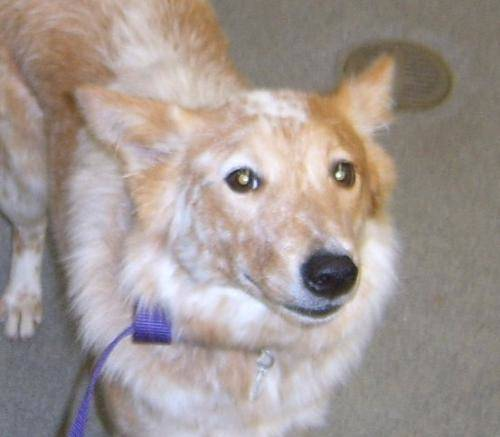

In [5]:
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/extracted_images/train/dog.5601.jpg')
cv2_imshow(img)

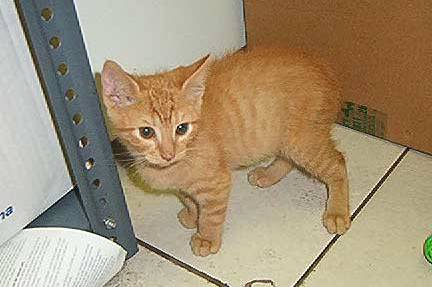

In [ ]:
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/extracted_images/train/cat.6910.jpg')
cv2_imshow(img)

In [6]:
cat = 0
dog = 0
for word in files_list:
  if "cat" in word.lower():
    cat += 1
  elif "dog" in word.lower():
    dog += 1

In [7]:
print(cat)
print(dog)

12500
12500


In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"/content/extracted_images/train") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path(r"/content/my_images") # create a new folder, rename it and get the path using copypath and paste the link here.


# define a function to create subsets for train, test and validation
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# calling the function thrice to create 3 subsets.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
cat_list = os.listdir(r"/content/my_images/train/dog")
print(sorted(cat_list))

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg', 'dog.107.jpg', 'dog.108.jpg', 'dog.109.jpg', 'dog.11.jpg', 'dog.110.jpg', 'dog.111.jpg', 'dog.112.jpg', 'dog.113.jpg', 'dog.114.jpg', 'dog.115.jpg', 'dog.116.jpg', 'dog.117.jpg', 'dog.118.jpg', 'dog.119.jpg', 'dog.12.jpg', 'dog.120.jpg', 'dog.121.jpg', 'dog.122.jpg', 'dog.123.jpg', 'dog.124.jpg', 'dog.125.jpg', 'dog.126.jpg', 'dog.127.jpg', 'dog.128.jpg', 'dog.129.jpg', 'dog.13.jpg', 'dog.130.jpg', 'dog.131.jpg', 'dog.132.jpg', 'dog.133.jpg', 'dog.134.jpg', 'dog.135.jpg', 'dog.136.jpg', 'dog.137.jpg', 'dog.138.jpg', 'dog.139.jpg', 'dog.14.jpg', 'dog.140.jpg', 'dog.141.jpg', 'dog.142.jpg', 'dog.143.jpg', 'dog.144.jpg', 'dog.145.jpg', 'dog.146.jpg', 'dog.147.jpg', 'dog.148.jpg', 'dog.149.jpg', 'dog.15.jpg', 'dog.150.jpg', 'dog.151.jpg', 'dog.152.jpg', 'dog.153.jpg', 'dog.154.jpg', 'dog.155.jpg', 'dog.156.jpg', 'dog.157.jpg', 'dog.158.jpg', 'dog

(281, 500, 3)


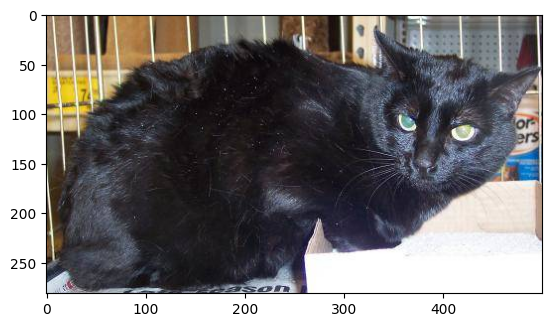

In [ ]:
cat1 = plt.imread(r"/content/my_images/train/cat/cat.959.jpg")
plt.imshow(cat1)
print(cat1.shape)

(374, 500, 3)


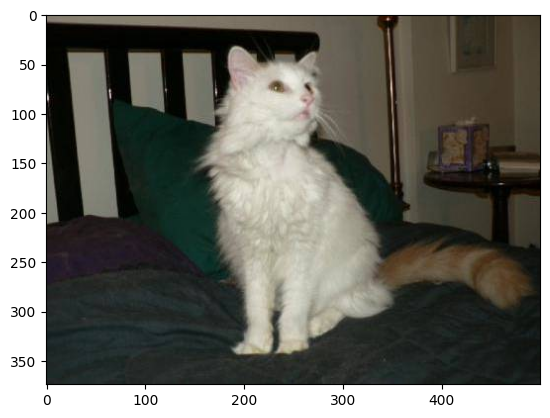

In [ ]:
cat2 = plt.imread(r"/content/my_images/train/cat/cat.667.jpg")
plt.imshow(cat2)
print(cat2.shape)

In [ ]:
cat2.shape
img.shape

(287, 432, 3)

In [9]:
## This step helps in converting all the images present in folder to same shape.
import cv2
import numpy as np
labels = ['cat', 'dog']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label) # path to cat folder inside train folder
        class_num = labels.index(label) # 0
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype="object")

In [10]:
train = get_data(r'/content/my_images/train')
test = get_data(r'/content/my_images/test')
val = get_data(r'/content/my_images/validation')



In [11]:
print(len(train))
print(train.shape)

2000
(2000, 2)


In [ ]:
a = 1
b = 2
c = 3
# [[a,123],[b,213],3[c,1]]
myarr = np.array([[1,123],[2,213],[3,31]])
print(myarr)
print(myarr.shape)

## The numpy array is able to convert nested list into 2d np array because the element of nested list is of same data type

[[  1 123]
 [  2 213]
 [  3  31]]
(3, 2)


In [ ]:
image1 = np.array([[2,3],[4,5]])
image2 = np.array([[5,3],[7,4]])
image3 = np.array([[3,4],[8,8]])

np.array([[image1,0],[image2,0],[image3,0]])
## The numpy array is unable to convert nested list into 2d np array because the element of nested list is of different data type

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 2) + inhomogeneous part.

In [ ]:
## Setting up every element inside the numpy array as Object to convert nested list into 2d np array
np.array([[image1,0],[image2,0],[image3,0]],dtype=object)

array([[array([[2, 3],
               [4, 5]]), 0],
       [array([[5, 3],
               [7, 4]]), 0],
       [array([[3, 4],
               [8, 8]]), 0]], dtype=object)

In [ ]:
np.array([[image1,0],[image2,0],[image3,0]],dtype=object).shape

In [12]:
print(len(train))
print(len(test))
print(train.shape)
print(test.shape)

2000
2000
(2000, 2)
(2000, 2)


In [13]:
print(type(train[1999][0]))
print(type(train[1999][1]))

<class 'numpy.ndarray'>
<class 'int'>


In [16]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(np.array(feature))
  y_train.append(int(label))

for feature, label in test:
  x_val.append(np.array(feature))
  y_val.append(int(label))

# Normalize the data
x_train = np.array(x_train).astype('float32') / 255
x_val = np.array(x_val).astype('float32') / 255



In [17]:
## Generating data or images during runtime for training purpose.DO not do it for testing
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [18]:
x_train.shape

(2000, 224, 224, 3)

In [19]:
model = Sequential()
model.add(Conv2D(16,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,369 (24.59 MB)

 Trainable params: 6,446,369 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [22]:
type(x_train)

numpy.ndarray

In [23]:
type(y_train)

list

In [24]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [25]:
#history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_val, y_val), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.69309, saving model to model.weights.best.keras
63/63 - 144s - 2s/step - accuracy: 0.5085 - loss: 0.6952 - val_accuracy: 0.4945 - val_loss: 0.6931
Epoch 2/10

Epoch 2: val_loss improved from 0.69309 to 0.69258, saving model to model.weights.best.keras
63/63 - 146s - 2s/step - accuracy: 0.5120 - loss: 0.6937 - val_accuracy: 0.5020 - val_loss: 0.6926
Epoch 3/10

Epoch 3: val_loss improved from 0.69258 to 0.69167, saving model to model.weights.best.keras
63/63 - 147s - 2s/step - accuracy: 0.5245 - loss: 0.6915 - val_accuracy: 0.5020 - val_loss: 0.6917
Epoch 4/10

Epoch 4: val_loss improved from 0.69167 to 0.69128, saving model to model.weights.best.keras
63/63 - 149s - 2s/step - accuracy: 0.5435 - loss: 0.6883 - val_accuracy: 0.5085 - val_loss: 0.6913
Epoch 5/10

Epoch 5: val_loss improved from 0.69128 to 0.69045, saving model to model.weights.best.keras
63/63 - 194s - 3s/step - accuracy: 0.5620 - loss: 0.6891 - val_accuracy: 0.5125 - v

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Task
fine tune the configuration
train the model on more than 100